In [1]:
import numpy as np
import pandas as pd

from dsc2024 import datasets
from dsc2024 import handling
from dsc2024 import features

# Data Handling

In [2]:
# Parameters
sampling = None # None to use everything
real_test = False # cancel sampling!

In [3]:
%%time

if real_test:
    sampling = None
df = datasets.get_train_dataset(sampling=sampling)

/home/lerax/Desktop/workspace/dsc2024/dsc2024/handling.py:40: PerformanceWarning: indexing past lexsort depth may impact performance.
  metar_value = metar_extra.metar.at[(station, hora_ref)].values[0]
2024-05-12 14:12:39.708 | WARNING  | dsc2024.handling:parse_metar_as_dataframe:57 - Error(row=149631): <class 'metpy.io._metar_parser.metar_parser.ParseError'> - Line 1: expected one of:

    - [\d] from METAR::datetime
    - "Z" from METAR::datetime

     1 | METAR COR SBSV 051300 10012KT 9999 FEW021 SCT050 28/24 Q1014=
                              ^
2024-05-12 14:12:39.712 | WARNING  | dsc2024.handling:parse_metar_as_dataframe:57 - Error(row=149639): <class 'metpy.io._metar_parser.metar_parser.ParseError'> - Line 1: expected one of:

    - [\d] from METAR::datetime
    - "Z" from METAR::datetime

     1 | METAR COR SBSV 051300 10012KT 9999 FEW021 SCT050 28/24 Q1014=
                              ^
2024-05-12 14:12:39.722 | WARNING  | dsc2024.handling:parse_metar_as_dataframe:57 - Erro

CPU times: user 6min 50s, sys: 1.28 s, total: 6min 51s
Wall time: 6min 52s


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211679 entries, 504a62621cd231d6ab67e674ce538cd3 to c962a2267ae4fe0afa4c3542ebdbd403
Data columns (total 72 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   hora_ref                       211679 non-null  datetime64[ns]
 1   origem                         211679 non-null  object        
 2   destino                        211679 non-null  object        
 3   url_img_satelite               208741 non-null  object        
 4   prev_troca_cabeceira           211679 non-null  int64         
 5   troca_cabeceira_hora_anterior  211679 non-null  int64         
 6   espera                         211679 non-null  float64       
 7   destino_altitude               211679 non-null  int64         
 8   destino_op_diurna              149526 non-null  object        
 9   destino_op_noturna             133082 non-null  object        
 10  destino_comprime

In [5]:
# drop columns with only has null values
df.dropna(axis=1, how="all", inplace=True)
df.info()

/tmp/ipykernel_363279/2335175760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, how="all", inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 211679 entries, 504a62621cd231d6ab67e674ce538cd3 to c962a2267ae4fe0afa4c3542ebdbd403
Data columns (total 72 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   hora_ref                       211679 non-null  datetime64[ns]
 1   origem                         211679 non-null  object        
 2   destino                        211679 non-null  object        
 3   url_img_satelite               208741 non-null  object        
 4   prev_troca_cabeceira           211679 non-null  int64         
 5   troca_cabeceira_hora_anterior  211679 non-null  int64         
 6   espera                         211679 non-null  float64       
 7   destino_altitude               211679 non-null  int64         
 8   destino_op_diurna              149526 non-null  object        
 9   destino_op_noturna             133082 non-null  object        
 10  destino_comprime

In [6]:
df = features.create_timedelta_features(df)

/home/lerax/Desktop/workspace/dsc2024/dsc2024/features.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hora_do_voo"] = df.hora_ref.apply(lambda x: x.hour)
/home/lerax/Desktop/workspace/dsc2024/dsc2024/features.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["hora_classe"] = df.hora_ref.apply(lambda x: _categorize_hour(x.hour))


In [7]:
# drop non-feature datetime / image columns (to be out of baseline for feature engineering)
datetime_columns = ["hora_ref", "metaf_date_time", "metar_date_time", "url_img_satelite"]
df.drop(columns=datetime_columns, inplace=True)
df.info()

/tmp/ipykernel_363279/4125835211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=datetime_columns, inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 211679 entries, 504a62621cd231d6ab67e674ce538cd3 to c962a2267ae4fe0afa4c3542ebdbd403
Data columns (total 70 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   origem                         211679 non-null  object 
 1   destino                        211679 non-null  object 
 2   prev_troca_cabeceira           211679 non-null  int64  
 3   troca_cabeceira_hora_anterior  211679 non-null  int64  
 4   espera                         211679 non-null  float64
 5   destino_altitude               211679 non-null  int64  
 6   destino_op_diurna              149526 non-null  object 
 7   destino_op_noturna             133082 non-null  object 
 8   destino_comprimento            211679 non-null  int64  
 9   destino_largura                211679 non-null  int64  
 10  destino_superficie             211679 non-null  object 
 11  destino_designacao_left        211679 n

In [8]:
# bad predictor or more than >25% missing values
useless_features = [
    "metar_current_wx3",
    # "metar_skyc4",
    # "metar_skylev4",
    "metaf_current_wx2",
    # "metaf_skylev1",
    # "metaf_skylev2",
    # "metar_skylev3",
    # "metar_skylev4",
    # "metar_wind_gust",
    # "metar_skyc3",
    # "metar_skylev3",
    "hora_do_voo"
]
def drop_useless_features(features):
    features.drop(columns=useless_features, inplace=True)
    return features

# drop_useless_features(df)

In [9]:
X = df.drop("espera", axis=1)
y = df.espera.astype(int)

In [10]:
# probability of having espera P(espera=1) = 1.74%, extremely unbanlaced 
y.value_counts() / y.count()

espera
0    0.982587
1    0.017413
Name: count, dtype: float64

In [11]:
cat_features = X.select_dtypes(include=['object']).columns.tolist()
embedding_features = ["vector"]
[cat_features.remove(x) for x in embedding_features]
cat_features,embedding_features

(['origem',
  'destino',
  'destino_op_diurna',
  'destino_op_noturna',
  'destino_superficie',
  'destino_designacao_left',
  'destino_designacao_right',
  'metar_station_id',
  'metar_current_wx1',
  'metar_current_wx2',
  'metar_current_wx3',
  'metar_skyc1',
  'metar_skyc2',
  'metar_skyc3',
  'metar_skyc4',
  'metar_remarks',
  'metaf_station_id',
  'metaf_current_wx1',
  'metaf_current_wx2',
  'metaf_current_wx3',
  'metaf_skyc1',
  'metaf_skyc2',
  'metaf_skyc3',
  'metaf_skyc4',
  'metaf_remarks',
  'hora_classe'],
 ['vector'])

# Data Imputation

In [12]:
# Fill categorical features with unknown class (a new category)
# numerical features will be filled with min-value catboost default strategy
cat_features_fill_map = {f: "UNKNOWN" for f in cat_features}
X.fillna(cat_features_fill_map, inplace=True)

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211679 entries, 504a62621cd231d6ab67e674ce538cd3 to c962a2267ae4fe0afa4c3542ebdbd403
Data columns (total 69 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   origem                         211679 non-null  object 
 1   destino                        211679 non-null  object 
 2   prev_troca_cabeceira           211679 non-null  int64  
 3   troca_cabeceira_hora_anterior  211679 non-null  int64  
 4   destino_altitude               211679 non-null  int64  
 5   destino_op_diurna              211679 non-null  object 
 6   destino_op_noturna             211679 non-null  object 
 7   destino_comprimento            211679 non-null  int64  
 8   destino_largura                211679 non-null  int64  
 9   destino_superficie             211679 non-null  object 
 10  destino_designacao_left        211679 non-null  object 
 11  destino_designacao_right       211679 n

# Data Split Train/Test

In [14]:
from sklearn.model_selection import train_test_split
random_state = 42
X_base_train, X_test, y_base_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)
X_train, X_eval, y_train, y_eval = train_test_split(X_base_train, y_base_train, test_size=1/8, random_state=random_state)

# real test -> to submit to kaggle, replace X_test from unlabelled samples and resplit train/eval dataset
# WARNING: in this mode, metrics report and confusion matrix are not reliable, since it trained with all data. So they are not show.
if real_test:
    # TODO: move this data handling to be by default at datasets.get_public_dataset()

    # data handling
    df_real_test = datasets.get_test_dataset()
    back = df_real_test.metaf_current_wx3.copy()
    df_real_test.dropna(axis=1, how="all", inplace=True)
    df_real_test['metaf_current_wx3'] = back
    df_reat_test = features.create_timedelta_features(df_real_test)
    df_real_test.drop(columns=datetime_columns, inplace=True)
    drop_useless_features(df_real_test)
    X_test = df_real_test
    X_test.fillna(cat_features_fill_map, inplace=True)

    # split
    _, X_eval, _, y_eval = train_test_split(X, y, test_size=0.20, random_state=random_state)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42336 entries, e3363a14bd61af40750f7af41ce1791e to 3f523ec8b1d1b5795269b30eb0772bda
Data columns (total 69 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   origem                         42336 non-null  object 
 1   destino                        42336 non-null  object 
 2   prev_troca_cabeceira           42336 non-null  int64  
 3   troca_cabeceira_hora_anterior  42336 non-null  int64  
 4   destino_altitude               42336 non-null  int64  
 5   destino_op_diurna              42336 non-null  object 
 6   destino_op_noturna             42336 non-null  object 
 7   destino_comprimento            42336 non-null  int64  
 8   destino_largura                42336 non-null  int64  
 9   destino_superficie             42336 non-null  object 
 10  destino_designacao_left        42336 non-null  object 
 11  destino_designacao_right       42336 non-null  object

# Add graph Features

In [15]:
from dsc2024 import features
X_train = features.generate_graph_features(X_train)
X_test = features.graph_features_testdata(X_test, X_train)
X_eval = features.graph_features_testdata(X_eval, X_train)

In [16]:
# Imputation by mean

# from sklearn.impute import SimpleImputer

# numeric_columns = X_train.select_dtypes(include='number').columns
# imputer = SimpleImputer(strategy="most_frequent").fit(X_train[numeric_columns])
# datasets_to_imput = [X_train, X_test, X_eval]
# for dataset in datasets_to_imput:
#     dataset_subset_imputed = imputer.transform(dataset[numeric_columns])
#     dataset[numeric_columns] = pd.DataFrame(dataset_subset_imputed, index=dataset.index, columns=numeric_columns)


In [17]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
prev_troca_cabeceira,148175.0,0.315343,0.464654,0.000000,0.000000,0.000000,1.000000,1.000000
troca_cabeceira_hora_anterior,148175.0,0.225504,0.417915,0.000000,0.000000,0.000000,0.000000,1.000000
destino_altitude,148175.0,510.954419,413.305505,3.000000,9.000000,750.000000,829.000000,1066.000000
destino_comprimento,148175.0,2581.410150,916.831118,1260.000000,1940.000000,3007.000000,3240.000000,4000.000000
destino_largura,148175.0,42.871301,5.234435,30.000000,45.000000,45.000000,45.000000,45.000000
metar_latitude,148167.0,-21.575239,5.249459,-30.000000,-23.620000,-23.000000,-19.630000,-8.130000
metar_longitude,148167.0,-45.423260,3.892660,-51.170000,-47.920000,-46.630000,-43.170000,-34.920000
metar_elevation,148167.0,511.587837,413.196205,3.000000,5.000000,750.000000,828.000000,1061.000000
metar_wind_direction,140236.0,158.536538,98.116078,0.000000,90.000000,140.000000,210.000000,360.000000
metar_wind_speed,148163.0,7.032377,3.786399,0.000000,4.000000,7.000000,9.000000,35.000000


In [18]:
# computer class weights
from sklearn.utils.class_weight import compute_class_weight
 
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_0 = class_weights[0]
class_weights = class_weights / class_0

# Training model

In [19]:
%%time
from catboost import CatBoostClassifier, Pool

train_data = Pool(
   data=X_train,
   label=y_train,
   cat_features=cat_features,
   embedding_features=embedding_features
)

# metric = "TotalF1:average=Macro;use_weights=False"
eval_metric = "Logloss"
metric = "F1:use_weights=false"
# eval_metric = metric # this may cause overfit with early_stopping_rounds enabled
model = CatBoostClassifier(
    iterations=3000,  
    early_stopping_rounds=70,  # Number of iterations to wait for improvement
    eval_metric=eval_metric,  # Metric to use for early stopping
    cat_features=cat_features,
    embedding_features=embedding_features,
    custom_loss=[metric],
    verbose=50,  # Print information every n iterations,
    random_seed=random_state,
    bagging_temperature=10,
    use_best_model=True,
    depth=16, # Maximum number of trees depth (you can adjust this)
    learning_rate=0.004,
    subsample=0.8,
    # class_weights=class_weights, # class weights, because dataset is unbalanced
    auto_class_weights="Balanced",
)


model.fit(train_data, eval_set=(X_eval, y_eval), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6897965	test: 0.6912553	best: 0.6912553 (0)	total: 4.21s	remaining: 3h 30m 40s
50:	learn: 0.5794085	test: 0.6244859	best: 0.6244859 (50)	total: 3m 35s	remaining: 3h 27m 39s
100:	learn: 0.5085702	test: 0.5903487	best: 0.5903487 (100)	total: 6m 45s	remaining: 3h 14m 5s
150:	learn: 0.4595986	test: 0.5707942	best: 0.5707942 (150)	total: 9m 47s	remaining: 3h 4m 49s
200:	learn: 0.4253976	test: 0.5599134	best: 0.5599134 (200)	total: 12m 14s	remaining: 2h 50m 26s
250:	learn: 0.3896575	test: 0.5555710	best: 0.5555710 (250)	total: 14m 59s	remaining: 2h 44m 11s
300:	learn: 0.3625008	test: 0.5530341	best: 0.5530341 (300)	total: 17m 55s	remaining: 2h 40m 39s
350:	learn: 0.3407600	test: 0.5529764	best: 0.5524496 (317)	total: 20m 56s	remaining: 2h 38m 2s
Stopped by overfitting detector  (70 iterations wait)

bestTest = 0.5524495827
bestIteration = 317

Shrink model to first 318 iterations.
CPU times: user 2h 31min 59s, sys: 3min 32s, total: 2h 35min 32s
Wall time: 26min 29s


In [20]:
y_pred = model.predict(X_test[model.feature_names_])

# Model evaluation

Classification Report: F1[class=1] = 0.166
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     41616
           1       0.10      0.56      0.17       720

    accuracy                           0.91     42336
   macro avg       0.54      0.73      0.56     42336
weighted avg       0.98      0.91      0.94     42336

Confusion Matrix:
[[37921  3695]
 [  320   400]]


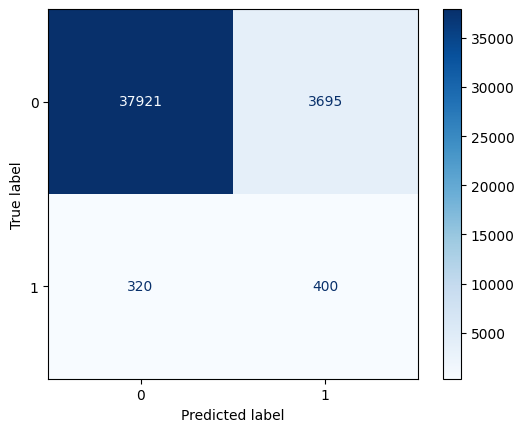

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score

if not real_test:
    report = classification_report(y_test, y_pred)
    f1_score_class1 = f1_score(y_test, y_pred, average=None)
    print(f"Classification Report: F1[class=1] = {round(f1_score_class1[1], 3)}")
    print(report)
    
    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

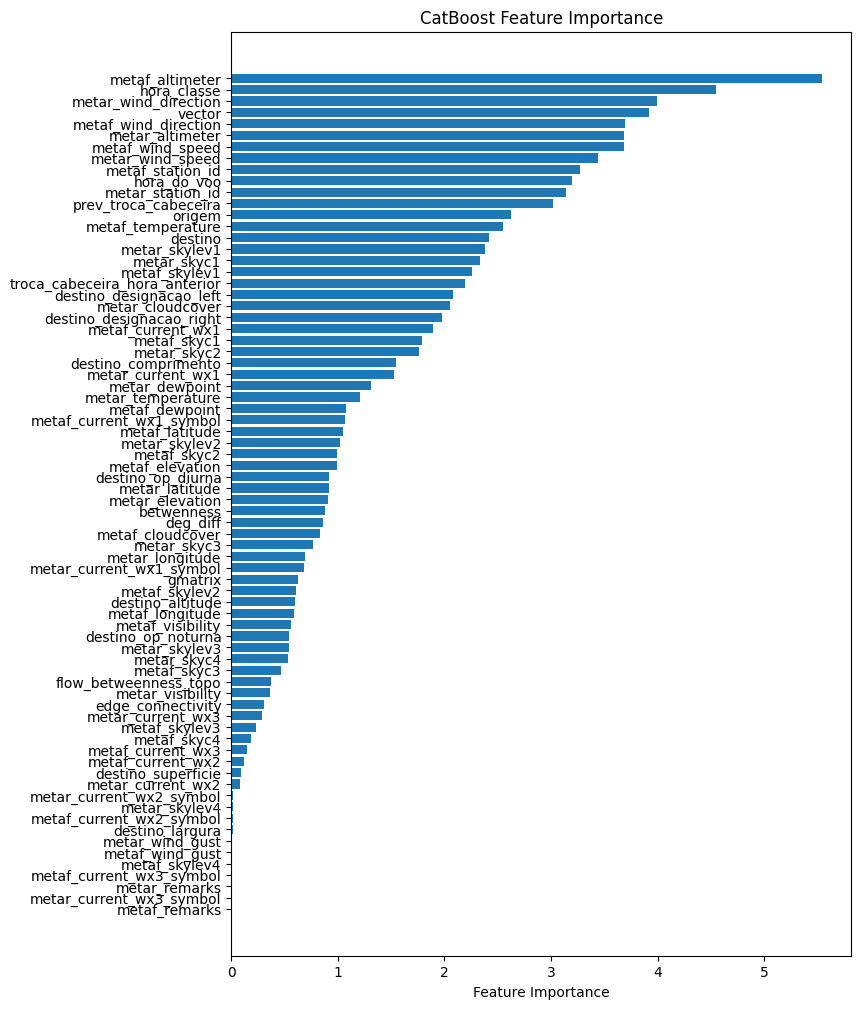

In [22]:
# plot feature importance
feature_importance = model.get_feature_importance(type='FeatureImportance')
feature_names = model.feature_names_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(8, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.show()

# Save prediction


In [23]:
if real_test:
    y_pred_series = pd.Series(y_pred, index=X_test.index, name="espera")
    y_pred_series.to_csv(datasets.datasets_dir / "catboost_submit.csv")
    y_pred_series.count()